1.Performing EDA for given dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [4]:
data=pd.read_csv('ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [8]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [9]:
df=data.drop(['KM'],axis=1)
df

,Price,Age_08_04,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,Diesel,90,0,2000,3,4,5,1165
1,13750,23,Diesel,90,0,2000,3,4,5,1165
2,13950,24,Diesel,90,0,2000,3,4,5,1165
3,14950,26,Diesel,90,0,2000,3,4,5,1165
4,13750,30,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,Petrol,86,0,1300,3,4,5,1015


In [10]:
correlation=df.corr(numeric_only=True)
correlation

,Price,Age_08_04,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
HP,0.314990,-0.156622,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


<Axes: >

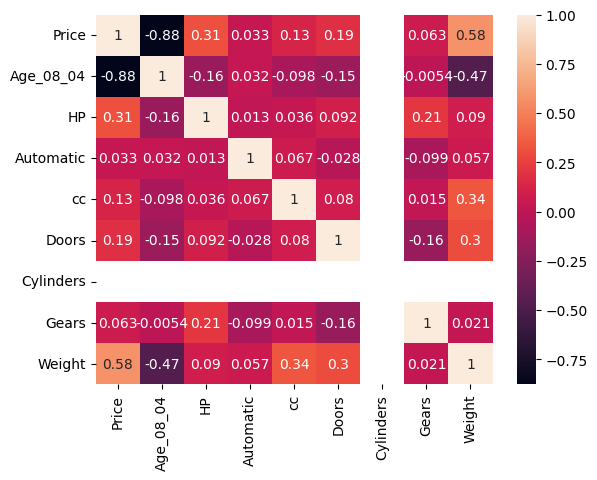

In [11]:
sns.heatmap(correlation,annot=True)

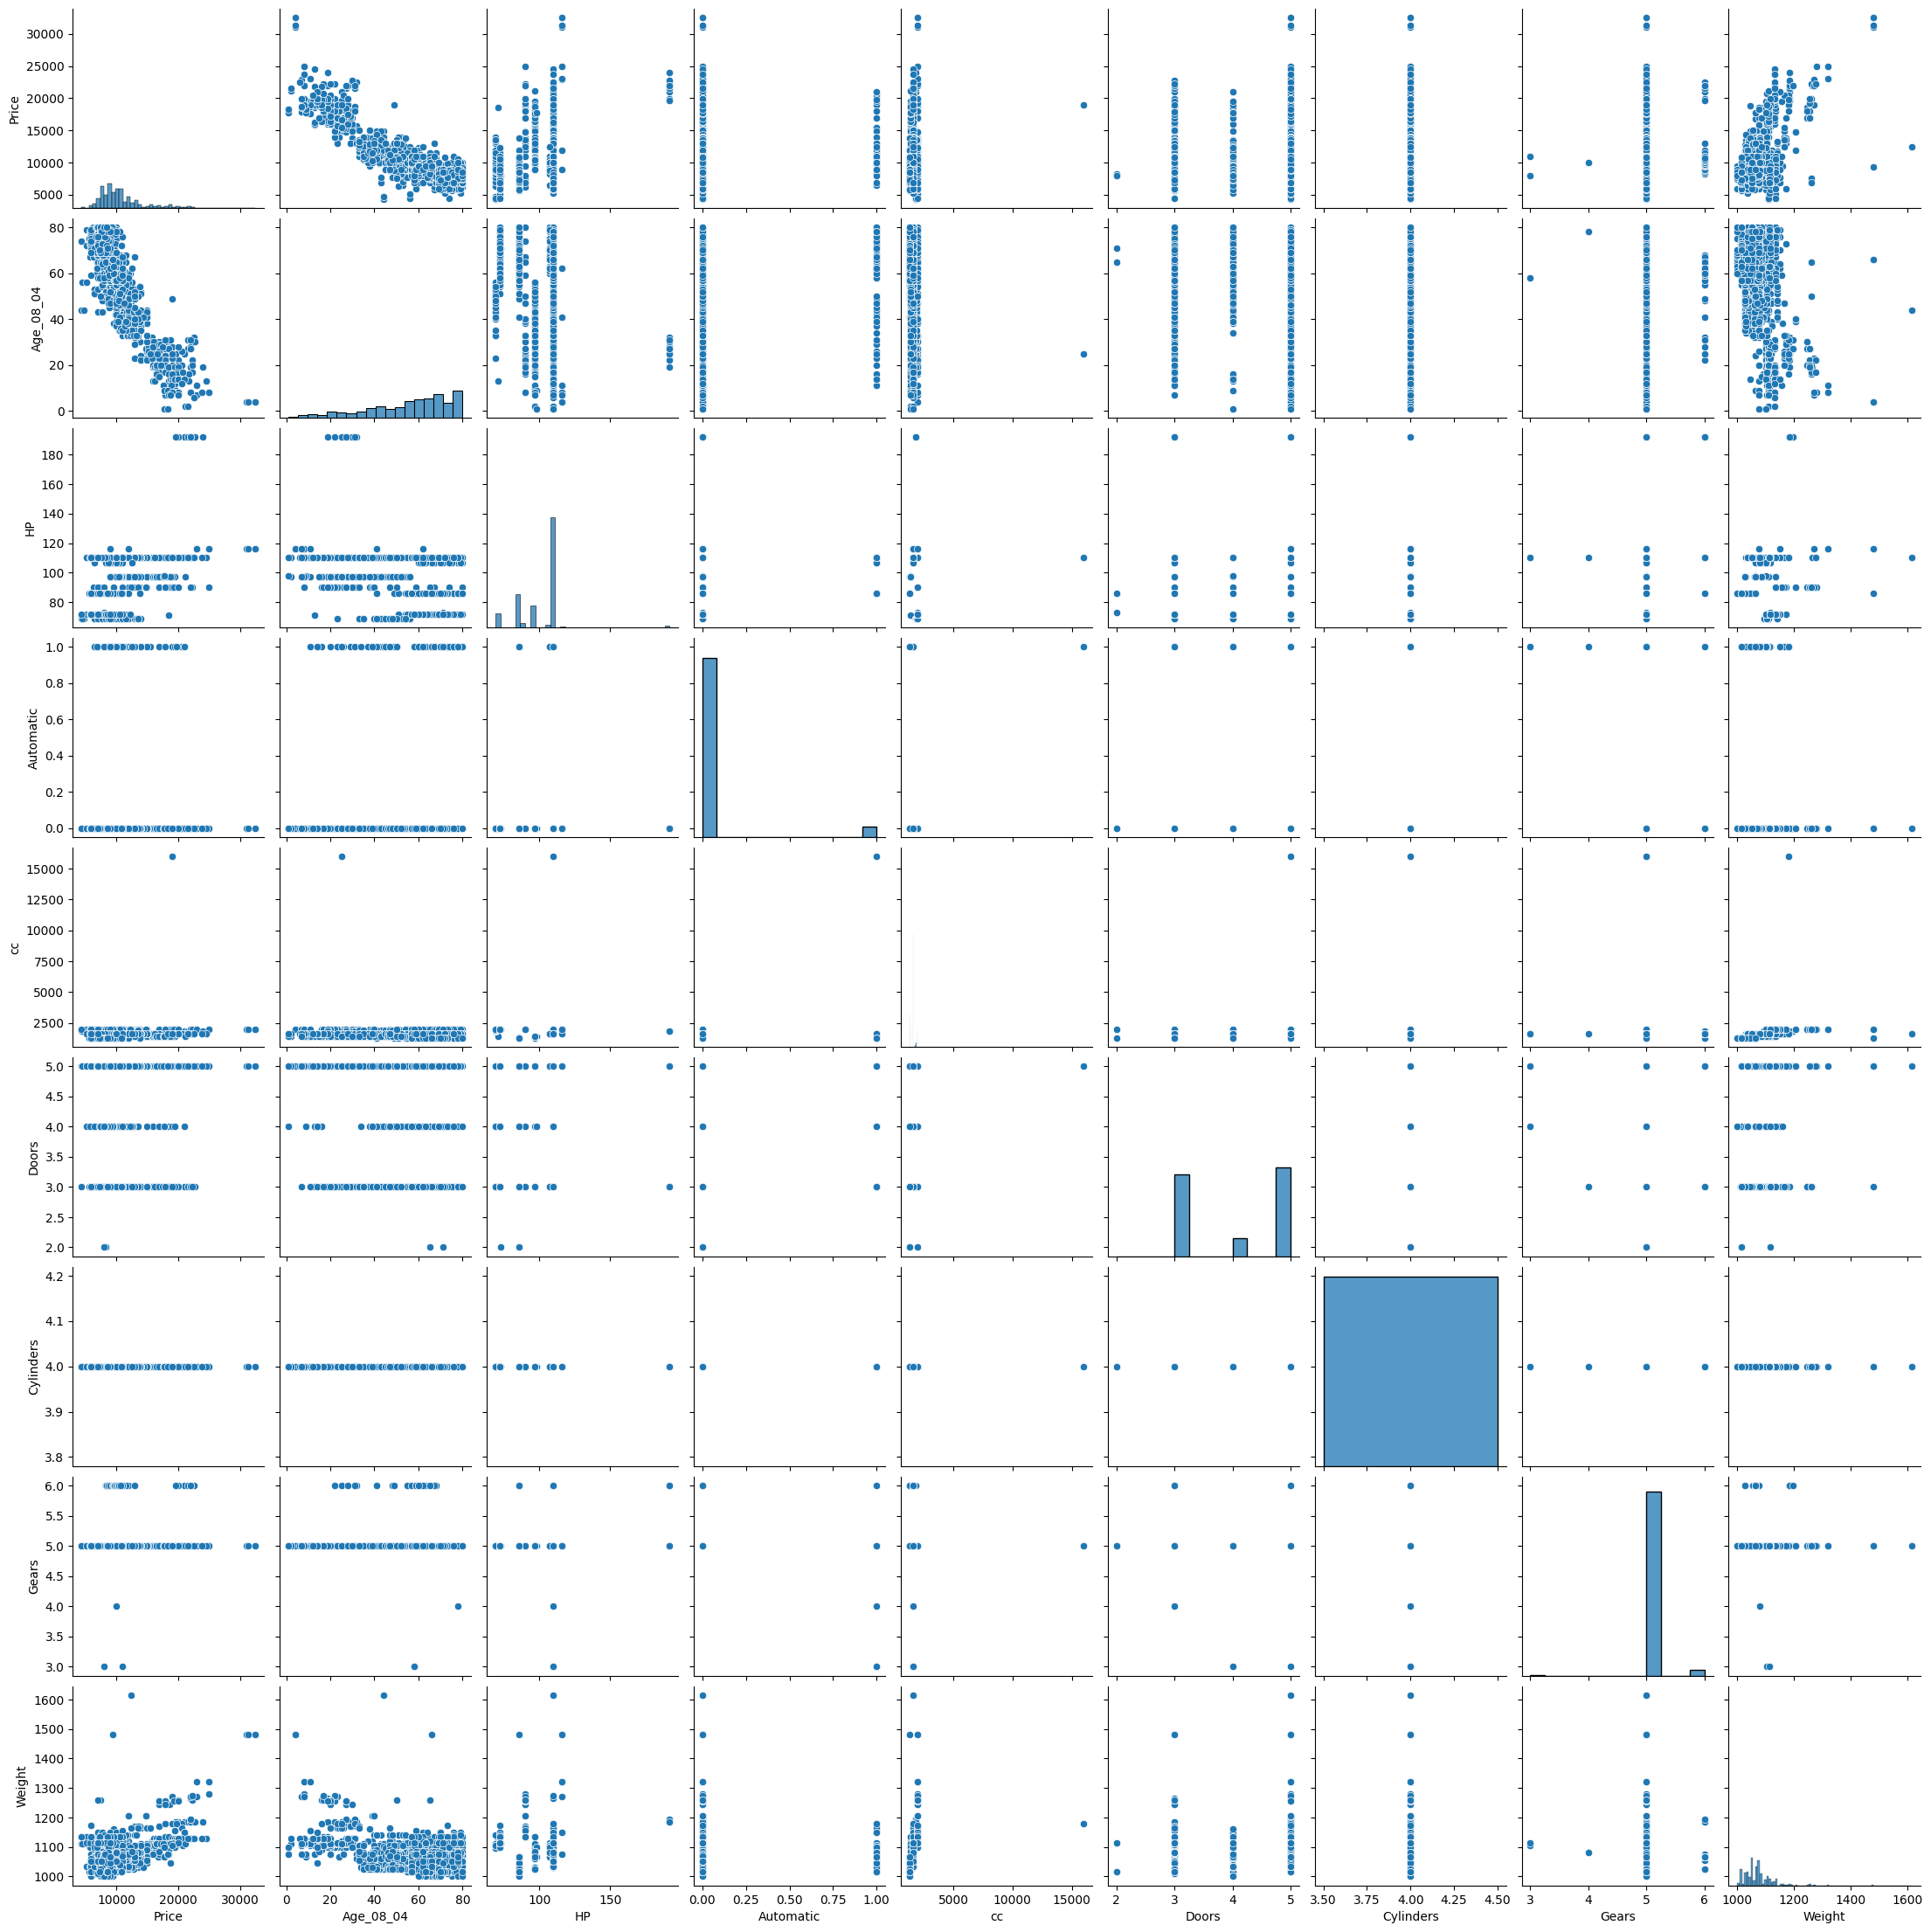

In [12]:
sns.pairplot(df)

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [19]:
from sklearn.model_selection import train_test_split
x=data.drop(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc','Doors', 'Cylinders', 'Gears', 'Weight'],axis=1)
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.8)
x,y

(      Price
 0     13500
 1     13750
 2     13950
 3     14950
 4     13750
 ...     ...
 1431   7500
 1432  10845
 1433   8500
 1434   7250
 1435   6950
 
 [1436 rows x 1 columns],
 0       13500
 1       13750
 2       13950
 3       14950
 4       13750
         ...  
 1431     7500
 1432    10845
 1433     8500
 1434     7250
 1435     6950
 Name: Price, Length: 1436, dtype: int64)

3.Applying MLR to training dataset

In [20]:
from sklearn.linear_model import LinearRegression

create model and fit it

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
r_sq=model.score(x_train,y_train)
print("coefficient of determination:",r_sq)

coefficient of determination: 1.0


In [24]:
print("Intercept:",model.intercept_)

Intercept: 0.0


In [25]:
print("coefficients:",model.coef_)

coefficients: [1.]


In [26]:
y_pred=model.predict(x_train)
print("Predicted response:",y_pred)

Predicted response: [ 7500.  8500.  9250. ...  7900. 11650.  5800.]


Evaluation metrics;

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
data = pd.read_csv("ToyotaCorolla - MLR.csv")
# Assuming your data has features in columns and the target variable in the last column
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize a random forest classifier (you can choose any classifier)
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(x_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.1875

Classification Report:
              precision    recall  f1-score   support

        1000       0.00      0.00      0.00         4
        1010       0.00      0.00      0.00         1
        1015       0.17      0.19      0.18        26
        1020       0.00      0.00      0.00         1
        1025       0.00      0.00      0.00        16
        1030       0.00      0.00      0.00         4
        1035       0.07      0.05      0.06        21
        1040       0.00      0.00      0.00         6
        1045       0.00      0.00      0.00         7
        1050       0.15      0.32      0.21        34
        1055       0.00      0.00      0.00        15
        1060       0.17      0.20      0.18         5
        1065       0.00      0.00      0.00         6
        1070       0.50      0.22      0.31        18
        1075       0.28      0.53      0.37        45
        1080       0.00      0.00      0.00        11
        1085       0.00      0.00      0

5.Apply Lasso and Ridge methods on the model.

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Lasso MSE:", lasso_mse)
print("Ridge MSE:", ridge_mse)


Interview Questions:

### 1.What is Normalization & Standardization and how is it helpful?
Ans;Normalization in data-science refers to the process of scalling numeric features to a common range,typically between 0 and 1.
The goal of normalization is to bring all the features into a similer scale,which is perticularly important for algorithms that are sensitive to the scale of the features

Standardization in data-science refers to the process of transforming data in such a way that it has mean of 0 and standard deviation of 1.
This process is also known as z-score normalization

### 2.What techniques can be used to address multicollinearity in multiple linear regression?
Ans; Multicollinearity occurs when independent variables in a regression model are highly correlated with each other.
This can cause issues in multiple linear regression, such as unstable coefficients estimates and difficulties in interpreting the importance of individual predictors.